# Проект Машинное обучение в бизнесе

## Выбор локации для скважины

**Цель проекта:** Построить модель для определения региона, где добыча принесёт наибольшую прибыль.

**План выполнения работы:**
* **1.Загрузка и подготовка данных**
* **2.Обучение и проверка модели**
* **3.Подготовка к расчёту прибыли**
* **4.Расчёт прибыли и рисков**
  * 4.1 Расчёт прибыли
  * 4.2 Расчёт рисков
* **5.Общий Вывод**

**Описание проекта:**
Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:
* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.Проанализируйте возможную прибыль и риски техникой Bootstrap.

**Описание данных:**
* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

## 1. Загрузка и подготовка данных

**Загрузка библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from numpy.random import RandomState
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import os
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

**Загрузим данные и ознакомимся с ними.**

In [28]:
pth1 = 'C:/Users/copok/Documents/Проекты/Яндекс практикум/8 Выбор локации для скважины/geo_data_0.csv'
pth2 = 'C:/Users/copok/Documents/Проекты/Яндекс практикум/8 Выбор локации для скважины/geo_data_1.csv'
pth3 = 'C:/Users/copok/Documents/Проекты/Яндекс практикум/8 Выбор локации для скважины/geo_data_2.csv'
pth4 = '/datasets/geo_data_0.csv'
pth5 = '/datasets/geo_data_1.csv'
pth6 = '/datasets/geo_data_2.csv'


if os.path.exists(pth1):
    df0 = pd.read_csv(pth1)
    df1 = pd.read_csv(pth2)
    df2 = pd.read_csv(pth3)
elif os.path.exists(pth2):
    df0 = pd.read_csv(pth4)
    df1 = pd.read_csv(pth5)
    df2 = pd.read_csv(pth6)
else:
    print('Something is wrong')

In [3]:
print(df0.head())
print()
print(df0.info())
print()
print('Количество дубликатов:', sum(df0.duplicated()))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество дубликатов: 0


In [4]:
print(df1.head())
print()
print(df1.info())
print()
print('Количество дубликатов:', sum(df1.duplicated()))

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество дубликатов: 0


In [5]:
print(df2.head())
print()
print(df2.info())
print()
print('Количество дубликатов:', sum(df2.duplicated()))

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество дубликатов: 0


* Данные соответствуют описанию. Пропусков и дубликатов нет.
* Типы данных соответствуют описанию.
* Посмотрим на гистограммы распределений данных.

In [6]:
def show_hists(data, data_label, num_bins, rug=False, log_scale=False):
    
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=data, ax=axes[1])
    plt.show()

In [7]:
def show_region(data, name):
    numerics = ['f0', 'f1', 'f2', 'product']
    for column in numerics:
        show_hists(data[column], name + ' ' + column, num_bins=20)

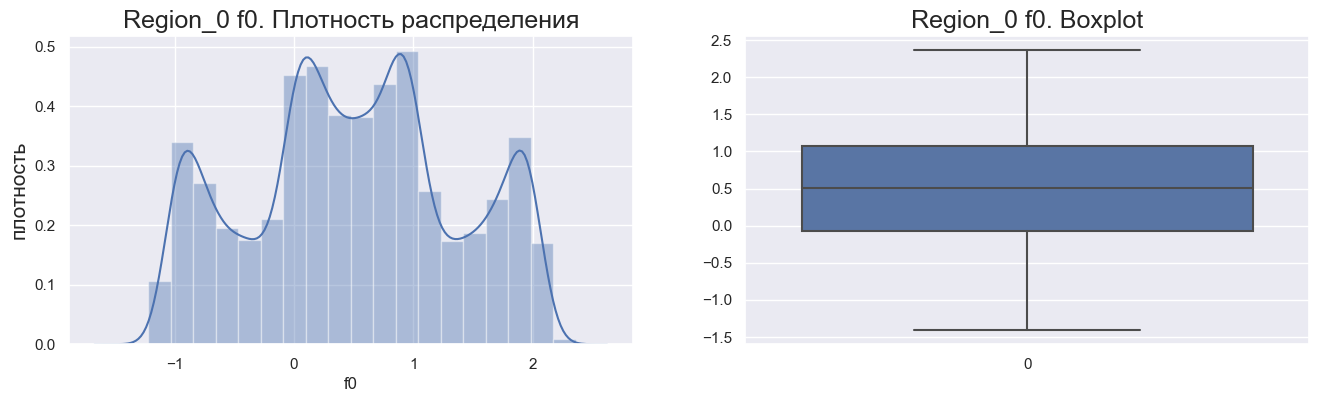

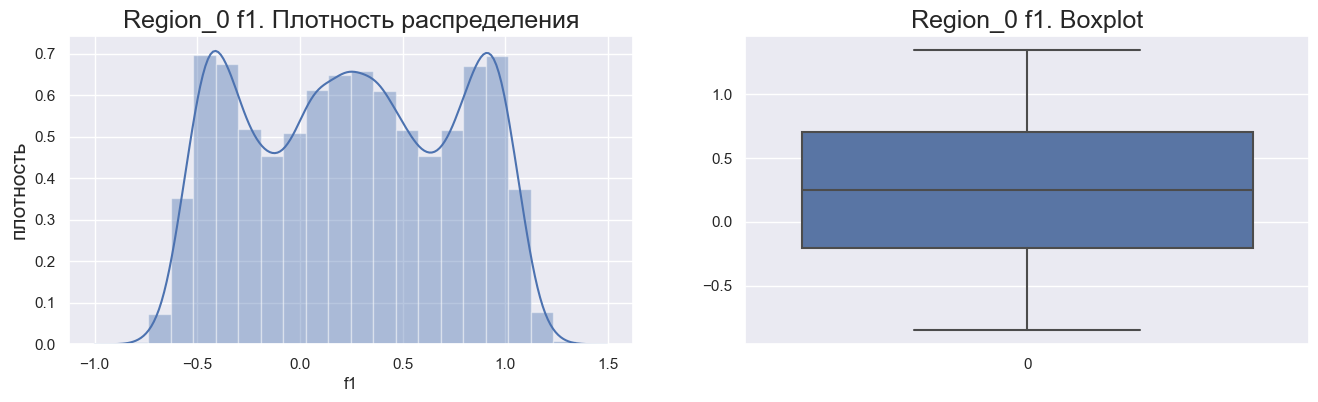

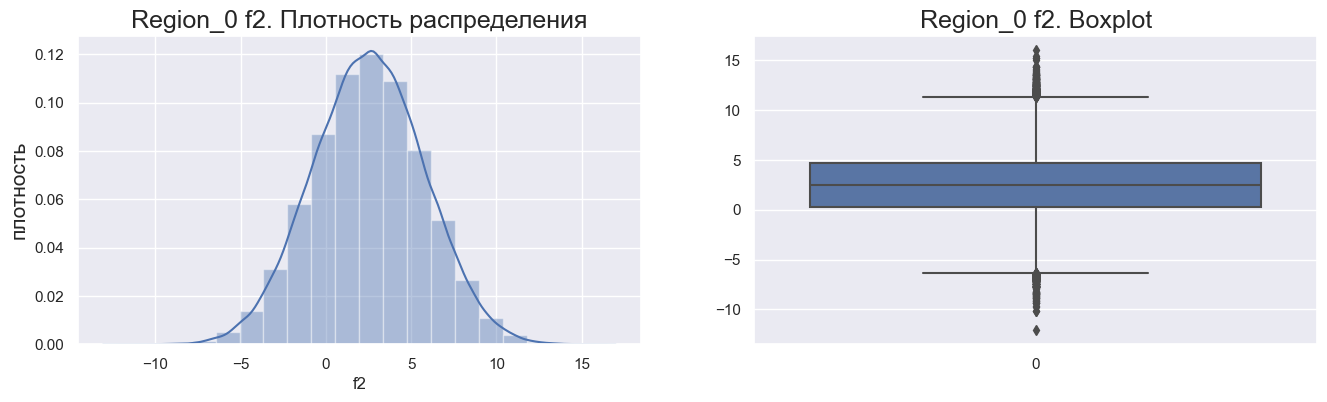

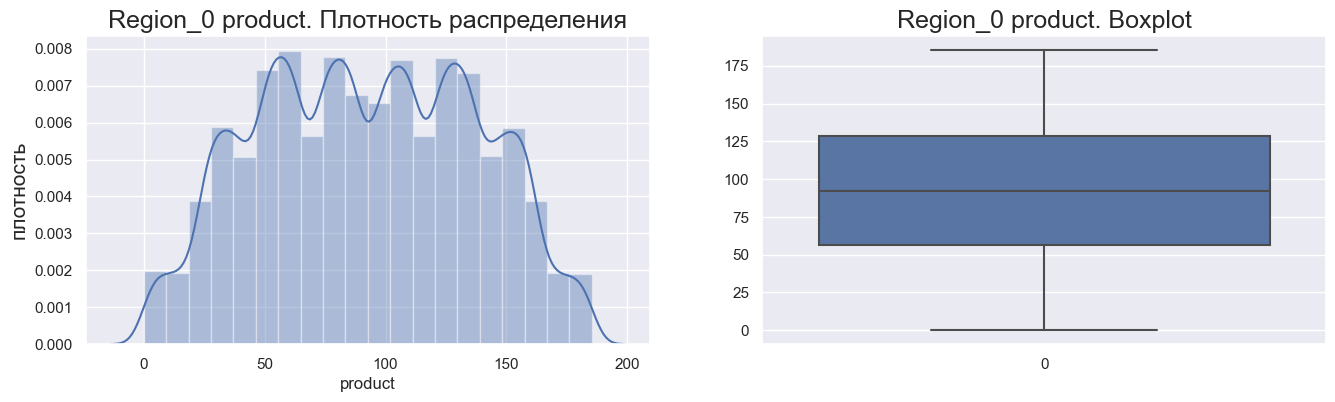

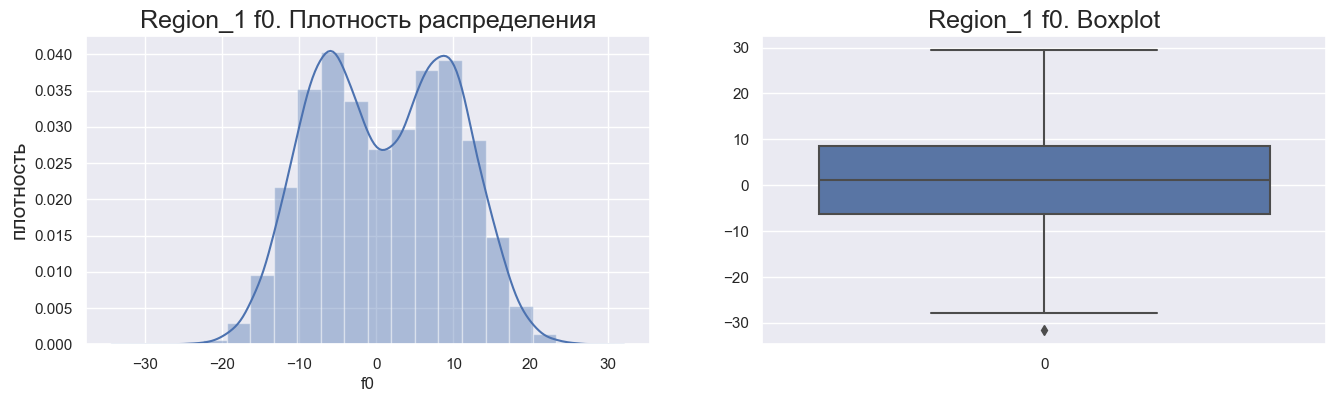

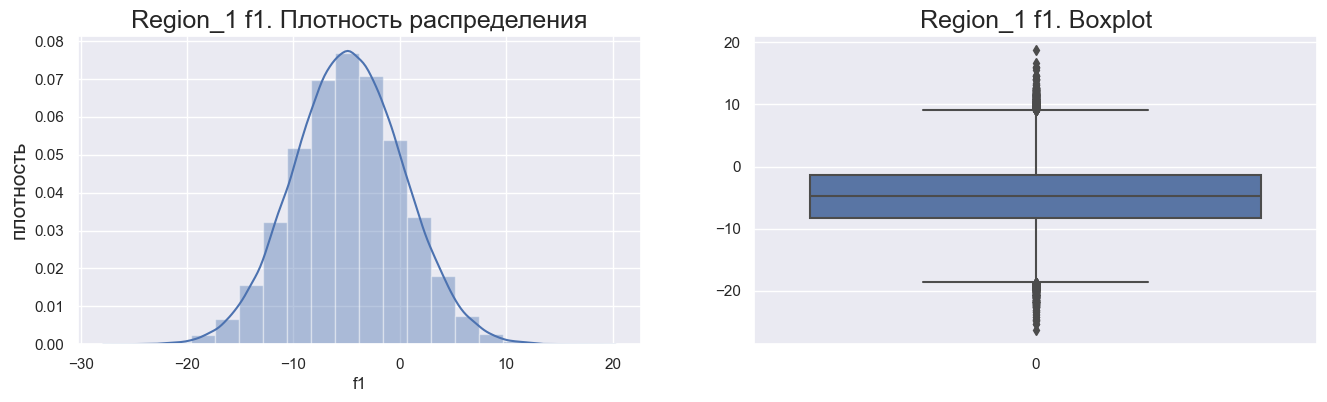

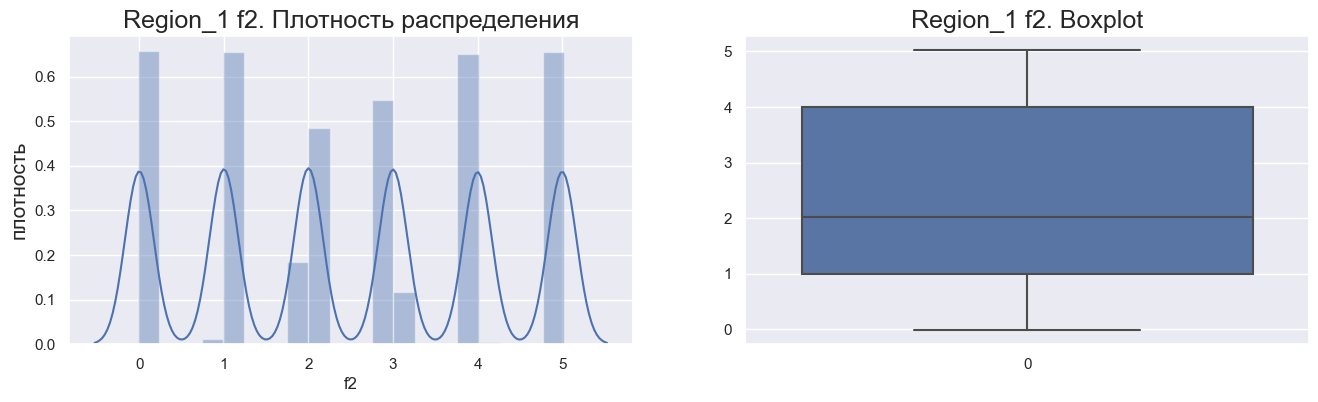

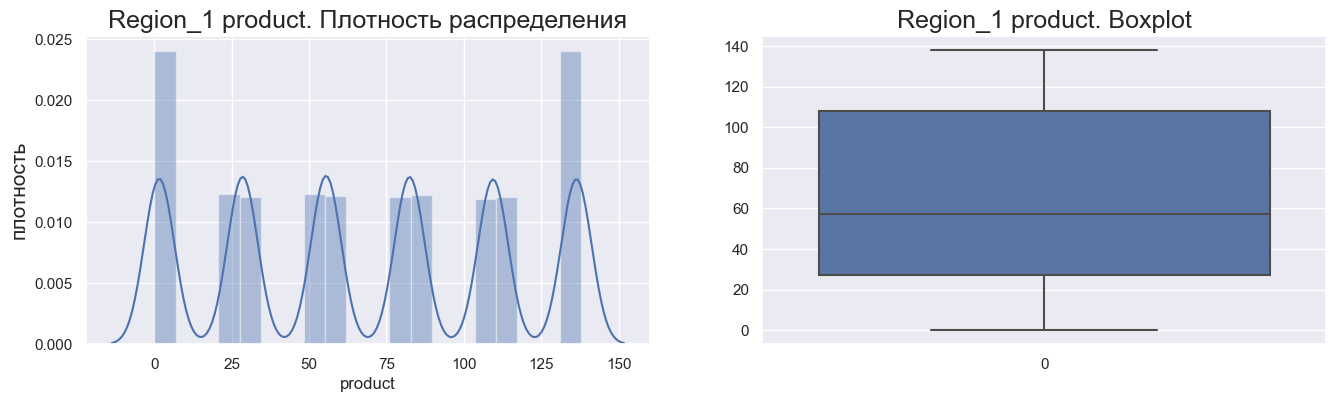

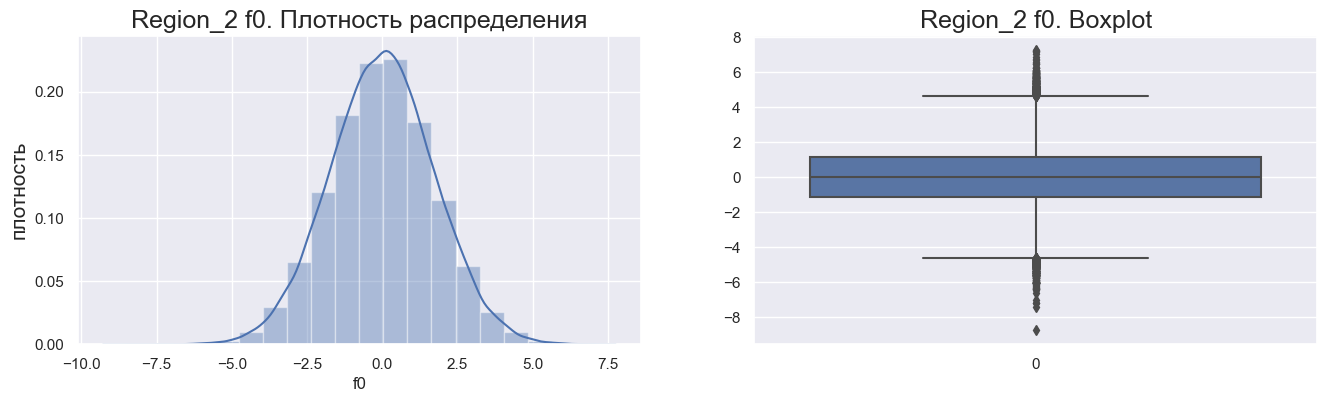

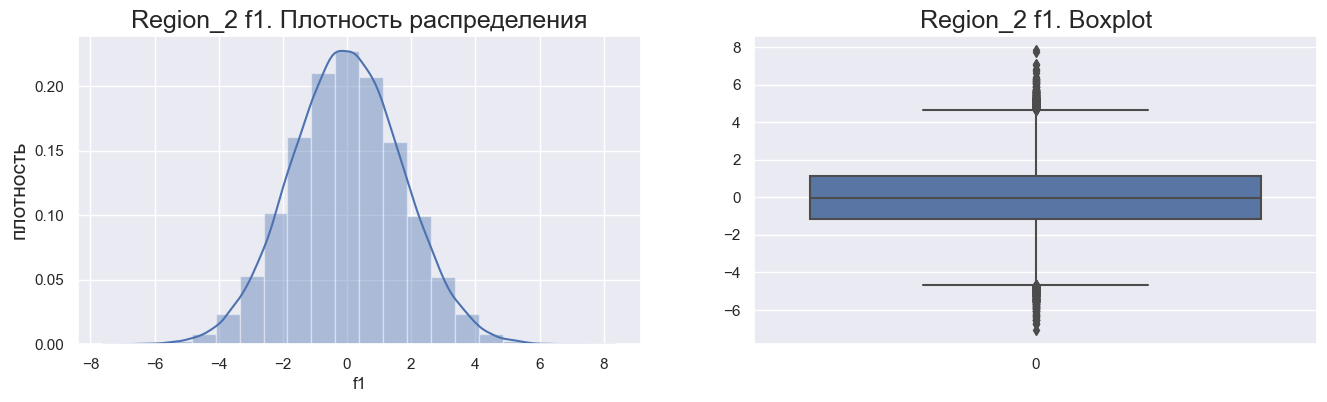

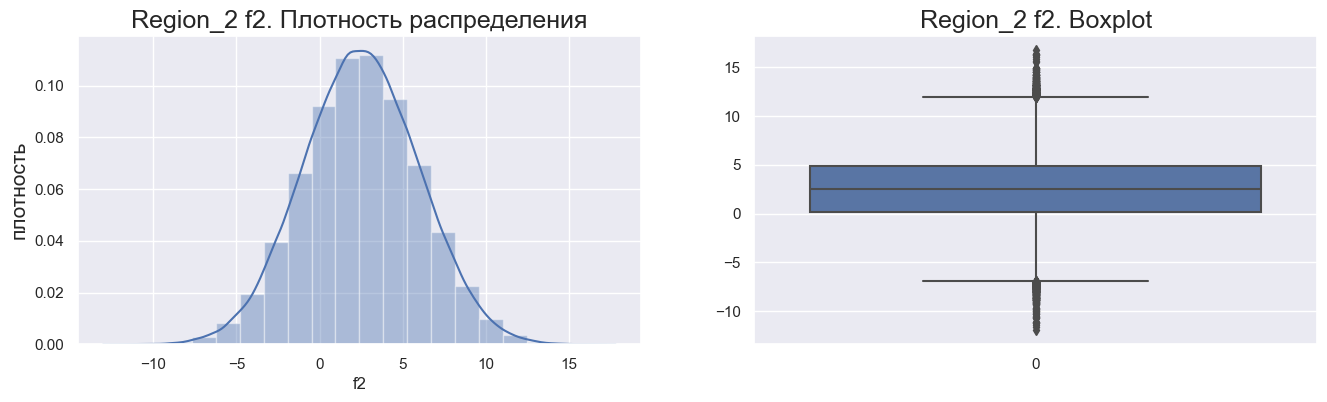

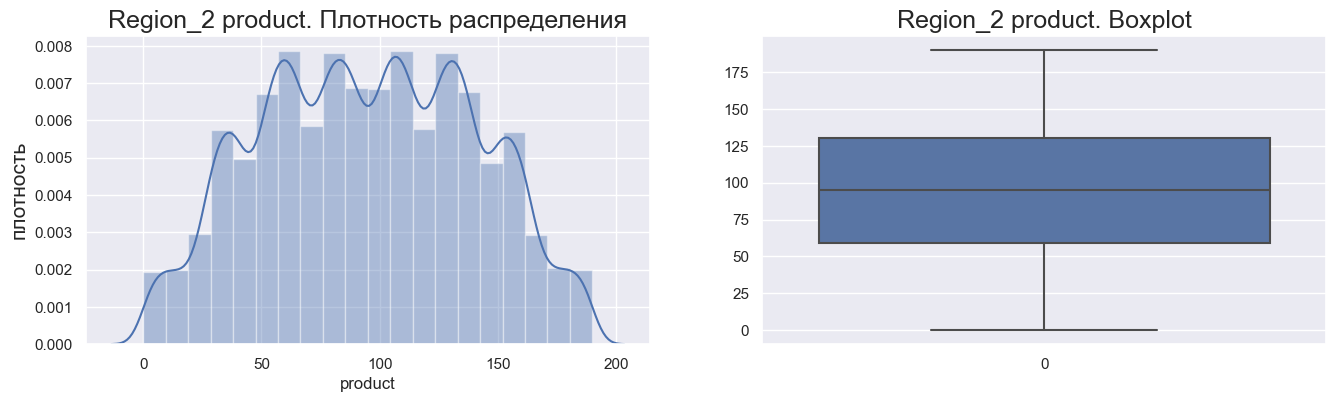

In [8]:
for data, name in [(df0, 'Region_0'), (df1, 'Region_1'), (df2, 'Region_2')]:
    show_region(data, name)

* Распределения некоторых признаков отличаются от нормального. Также присутствуют небольшие выбросы. Так как неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов.
* Масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга (меньше одного порядка). Нет необходимости применять масштабирование.
* На данном этапе оставим данные как есть.
* Разделим данные на признаки и целевой признак.

In [9]:
feature_names = ['f0', 'f1', 'f2']
target_name = ['product']
X_0 = df0[feature_names]
y_0 = df0[target_name]
X_1 = df1[feature_names]
y_1 = df1[target_name]
X_2 = df2[feature_names]
y_2 = df2[target_name]

## Вывод

* Данные успешно загружены и проанализированы. Данные соответствуют описанию. Пропусков и дубликатов нет. Типы данных соответствуют описанию.
* Распределения некоторых признаков отличаются от нормального. Также присутствуют небольшие выбросы. Так как неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов. Данные оставлены без изменений.

## 2. Обучение и проверка модели

Для каждого региона:

* Разделим данные на обучающую и валидационную выборки
* Используем модель линейной регрессии по техническому заданию.
* Выведем средний запас предсказанного сырья и RMSE модели.

In [10]:
def model_fit_valid(X, y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    print('Train shape:', X_train.shape)
    print('Valid shape:', X_valid.shape)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)

    predict_mean = predict.mean()
    rmse = mean_squared_error(y_valid, predict)**.5

    print('Cредний запас предсказанного сырья: {:.4f}'.format(predict_mean))
    print('RMSE модели: {:.4f}'.format(rmse))
    
    return y_valid, predict
    

* **Регион 0**

In [11]:
y_0_valid, predict_0 = model_fit_valid(X_0, y_0)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 92.5926
RMSE модели: 37.5794


* **Регион 1**

In [12]:
y_1_valid, predict_1 = model_fit_valid(X_1, y_1)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 68.7285
RMSE модели: 0.8931


* **Регион 2**

In [13]:
y_2_valid, predict_2 = model_fit_valid(X_2, y_2)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 94.9650
RMSE модели: 40.0297


## Вывод

* В регионах 0 и 2 достаточно высокий средний показатель запаса предсказанного сырья (**92.6** и **94,96** соответственно). Однако RMSE для данных регионов также высок (**37.6** и **40** соответственно). Это свидетельствует о неоднозначности показателя, неточности модели регрессии.
* В регионе 1 средний показатель запаса предсказанного сырья составляет **68.7** (ниже остальных регионов). Однако RMSE в данном регионе также мал (**0.9**). Это говорит о точности предсказаний и качестве построенной модели.

## 3. Подготовка к расчёту прибыли

* Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.
* Сравним полученный объём сырья со средним запасом в каждом регионе.

**min_product = budget / (top_wells * unit_income)**
* **budget** - Бюджет на разработку скважин в регионе — 10 млрд рублей
* **top_wells, samp_wells** - При расчёте выбирают 200 лучших скважин из 500 в выборке
* **unit_income** - Доход с каждой единицы продукта составляет 450 тыс. рублей

In [14]:
BUDGET = 10**10
TOP_WELLS = 200
SAMP_WELLS = 500
UNIT_INCOME = 4.5*10**5

In [15]:
min_product = BUDGET / (TOP_WELLS * UNIT_INCOME)
print('Минимальный объём продукта с одной скважины для безубыточной разработки: {:.2f}'.format(min_product))

Минимальный объём продукта с одной скважины для безубыточной разработки: 111.11


## Вывод

* Минимальный объём продукта для безубыточной разработки составляет 111.11. Данный показатель рассчитан при условии выбора 200 лучших скважин из 500 в выборке.
* Данное значение превышает средние значения запасов скважин по всем регионам.

## 4. Расчёт прибыли и рисков

### 4.1 Расчёт прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

* Выберем скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины. В нашем случае выберем случайно 500 точек и отберём 200 с максимальным показателем объёма сырья
* Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
* Рассчитаем прибыль для полученного объёма сырья.

In [16]:
y_0_valid = pd.Series(y_0_valid['product']).reset_index(drop=True)
y_1_valid = pd.Series(y_1_valid['product']).reset_index(drop=True)
y_2_valid = pd.Series(y_2_valid['product']).reset_index(drop=True)

In [17]:
predict_0 = pd.Series(*predict_0.reshape(1,-1))
predict_1 = pd.Series(*predict_1.reshape(1,-1))
predict_2 = pd.Series(*predict_2.reshape(1,-1))

In [18]:
def show_predicted_income(region, top_wells_mean, volume, income):
    print('===', region, '===')
    print('Средний запас сырья среди скважин с максимальным показателем: {:.2f}'.format(top_wells_mean))
    print('Суммарный целевой объём сырья: {:.2f}'.format(volume))
    print('Прибыль для полученного объёма сырья: {:.2f}'.format(income))

In [19]:
state = 12345
def predicted_income(target, predicts, region, state, replace=False, show_res=True, return_res=False):
   
    sample_preds = predicts.sample(n=SAMP_WELLS, 
                                   replace=replace, 
                                   random_state=state)
    top_preds = sample_preds.sort_values(ascending=False)[:TOP_WELLS]
    top_targets = target[top_preds.index]
    top_wells_mean = top_targets.mean()
    volume = sum(top_targets)
    income = volume * UNIT_INCOME - BUDGET
    if show_res:
        show_predicted_income(region, top_wells_mean, volume, income)
    if return_res:
        return income

In [20]:
predicted_income(y_0_valid, predict_0, 'Регион 0', state)

=== Регион 0 ===
Средний запас сырья среди скважин с максимальным показателем: 118.66
Суммарный целевой объём сырья: 23731.26
Прибыль для полученного объёма сырья: 679068857.89


In [21]:
predicted_income(y_1_valid, predict_1, 'Регион 1', state)

=== Регион 1 ===
Средний запас сырья среди скважин с максимальным показателем: 119.77
Суммарный целевой объём сырья: 23954.40
Прибыль для полученного объёма сырья: 779479884.18


In [22]:
predicted_income(y_2_valid, predict_2, 'Регион 2', state)

=== Регион 2 ===
Средний запас сырья среди скважин с максимальным показателем: 116.00
Суммарный целевой объём сырья: 23199.98
Прибыль для полученного объёма сырья: 439990143.02


### 4.2 Расчёт рисков

* Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [23]:
def show_risks(region, income_mean, conf_int_left, conf_int_right, loss_rate):
    print('===', region, '===')
    print('Средняя прибыль {:.2f} (млн. Р)'.format(income_mean / 10**6))
    print('95% доверительный интервал: {:.2f} : {:.2f} (млн. Р)'.format(conf_int_left / 10**6, conf_int_right / 10**6))
    print('Риск убытков: {:.2f} %'.format(loss_rate * 100))

In [24]:
def risk_calc(target, predicts, region):
   
    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(12345)
    for _ in range(bootstrap_samples):
        income = predicted_income(target, predicts, region, state, replace=True, show_res=False, return_res=True)
        incomes.append(income)

    incomes = pd.Series(incomes)
    income_mean = incomes.mean()
    conf_int_left = incomes.quantile(alpha/2)
    conf_int_right = incomes.quantile(1 - alpha/2)
    
    loss_count = 0
    for inc in incomes :
        if inc < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
    
    show_risks(region, income_mean, conf_int_left, conf_int_right, loss_rate)

In [25]:
risk_calc(y_0_valid, predict_0, 'Регион 0')

=== Регион 0 ===
Средняя прибыль 396.16 (млн. Р)
95% доверительный интервал: -111.22 : 909.77 (млн. Р)
Риск убытков: 6.90 %


In [26]:
risk_calc(y_1_valid, predict_1, 'Регион 1')

=== Регион 1 ===
Средняя прибыль 456.05 (млн. Р)
95% доверительный интервал: 33.82 : 852.29 (млн. Р)
Риск убытков: 1.50 %


In [27]:
risk_calc(y_2_valid, predict_2, 'Регион 2')

=== Регион 2 ===
Средняя прибыль 404.40 (млн. Р)
95% доверительный интервал: -163.35 : 950.36 (млн. Р)
Риск убытков: 7.60 %


## Выводы

При расчёте показателей для 200 наилучших скважин из 500 в выборке:
* Средний запас сырья с лучших скважин с насэмплированных по предсказанию скважин среди всех регионов (**118.66**, **119.77**, **116.00** соответственно) превосходит минимально необходимый объём **111.11**.
При применении техники bootstrap:
* Оценка средней прибыли максимальна для региона 1 (**456.05** млн.).
* Только регион 1 прогнозирует прибыльную разработку по 95% доверительному интервалу.
* Риск убытков для региона 1 (**1.5%**)


## 5. Общий Вывод

**При начальном построении модели и предсказаний:**
* В регионах 0 и 2 достаточно высокий средний показатель запаса предсказанного сырья. Однако RMSE для данных регионов также высок (**37.6** и **40** соответственно). Это свидетельствует о неоднозначности показателя, неточности модели регрессии.
* В регионе 1 средний показатель запаса предсказанного сырья составляет **68.7** (ниже остальных регионов). Однако RMSE в данном регионе также мал (**0.9**). Это говорит о точности предсказаний и качестве построенной модели.
* Средние показатели предсказанного сырья для одной скважины ниже теоретически необходимых (**111.11**)


**При расчёте показателей для 200 наилучших скважин из выборочных 500:**
* Средний запас сырья с одной скважины среди всех регионов превосходит минимально необходимый объём.


**При применении техники bootstrap:**
* Оценка средней прибыли максимальна для региона 1 (**456.05** млн.).
* Только регион 1 прогнозирует прибыльную разработку по 95% доверительному интервалу.
* Риск убытков для региона 1 (**1.5%**)


**Рекомендуем регион 1 для разработки.**